## Notebook04b

### Setup

Run all of the following before starting the notebook.

In [2]:
! wget -q -nc https://raw.githubusercontent.com/taylor-arnold/fds-py/refs/heads/main/funs.py

In [3]:
import numpy as np
import polars as pl

from funs import *
from plotnine import *
from polars import col as c
theme_set(theme_minimal())

ub = "https://raw.githubusercontent.com/taylor-arnold/fds-py-nb/refs/heads/main/"

In [4]:
film = pl.read_csv(ub + "data/criterion.csv")
film

imdb_id,title,year,language,genre,director,writer,country,imdb_votes,rating_imdb,rating_rt,rating_mc,runtime_raw,wikipedia_pageid,wikipedia_description,wikipedia_extract,budget_raw,box_office_raw
str,str,i64,str,str,str,str,str,i64,f64,i64,i64,i64,i64,str,str,i64,i64
"""tt0012349""","""The Kid""",1921,"""None|English""","""Comedy|Drama|Family""","""Charles Chaplin""","""Charles Chaplin""","""United States""",142797,8.2,100,null,68,1346905,"""1921 silent film by Charlie Ch…","""The Kid is a 1921 American sil…",250000,null
"""tt0012364""","""The Phantom Carriage""",1921,"""None|Swedish""","""Drama|Fantasy|Horror""","""Victor Sjöström""","""Selma Lagerlöf|Victor Sjöström""","""Sweden""",15311,8.0,100,null,106,7329426,"""1921 film by Victor Sjöström""","""The Phantom Carriage is a 1921…",null,null
"""tt0013257""","""Häxan""",1922,"""Swedish|Danish""","""Documentary|Fantasy|Horror""","""Benjamin Christensen""","""Benjamin Christensen""","""Sweden|Denmark""",18391,7.6,93,null,107,3644898,"""Swedish 1922 silent horror ess…","""Häxan is a 1922 Swedish-Danish…",2000000,null
"""tt0014429""","""Safety Last!""",1923,"""English""","""Action|Comedy|Thriller""","""Fred C. Newmeyer|Sam Taylor""","""Hal Roach|Sam Taylor|Tim Whela…","""United States""",23503,8.1,97,null,73,76313,"""1923 American silent romantic …","""Safety Last! is a 1923 America…",121000,null
"""tt0014624""","""A Woman of Paris: A Drama of F…",1923,"""English""","""Drama|Romance""","""Charles Chaplin""","""Charles Chaplin""","""United States""",6548,6.9,94,76,84,546663,"""1923 drama film by Charlie Cha…","""A Woman of Paris is a 1923 sil…",351000,634000
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""tt28618488""","""Vermiglio""",2024,"""Italian|Latin""","""Drama|History""","""Maura Delpero""","""Maura Delpero""","""Italy|France|Belgium""",4838,6.9,93,85,119,77421920,"""2024 film by Maura Delpero""","""Vermiglio , also known as The …",null,null
"""tt29714081""","""The Cloud""",2024,"""English""","""Short""","""Dean Walton""","""N/A""","""United Kingdom""",null,null,null,null,null,null,null,null,null,null
"""tt32085997""","""Misericordia""",2024,"""French""","""Comedy|Crime|Drama""","""Alain Guiraudie""","""Alain Guiraudie""","""France|Spain|Portugal""",2537,7.1,94,83,103,76603314,"""2024 film by Alain Guiraudie""","""Misericordia is a 2024 black c…",null,null


### Questions

The Criterion Films dataset effecively has multiple tables inside of it. However, these are stored inside a single larger table keyed on the movie. The language, genre, director, writer, and country are stored with one or more values pushed together with a vertical pipe. Using the text from the notes, we can convert this into data with a unit of observation about any of these columns. And, what's nice about this is we get a join with the movie-data for free: all of those columns already exist.

To get a sense of what this looks like, create a version of the data with one row for each film and language pair. You should see that the number of rows increases from the original dataset.

In [5]:
exp_film = (
    film
    .with_columns(
        langs = c.language.str.split("|")
    )
    .explode(c.langs)
)
exp_film

imdb_id,title,year,language,genre,director,writer,country,imdb_votes,rating_imdb,rating_rt,rating_mc,runtime_raw,wikipedia_pageid,wikipedia_description,wikipedia_extract,budget_raw,box_office_raw,langs
str,str,i64,str,str,str,str,str,i64,f64,i64,i64,i64,i64,str,str,i64,i64,str
"""tt0012349""","""The Kid""",1921,"""None|English""","""Comedy|Drama|Family""","""Charles Chaplin""","""Charles Chaplin""","""United States""",142797,8.2,100,null,68,1346905,"""1921 silent film by Charlie Ch…","""The Kid is a 1921 American sil…",250000,null,"""None"""
"""tt0012349""","""The Kid""",1921,"""None|English""","""Comedy|Drama|Family""","""Charles Chaplin""","""Charles Chaplin""","""United States""",142797,8.2,100,null,68,1346905,"""1921 silent film by Charlie Ch…","""The Kid is a 1921 American sil…",250000,null,"""English"""
"""tt0012364""","""The Phantom Carriage""",1921,"""None|Swedish""","""Drama|Fantasy|Horror""","""Victor Sjöström""","""Selma Lagerlöf|Victor Sjöström""","""Sweden""",15311,8.0,100,null,106,7329426,"""1921 film by Victor Sjöström""","""The Phantom Carriage is a 1921…",null,null,"""None"""
"""tt0012364""","""The Phantom Carriage""",1921,"""None|Swedish""","""Drama|Fantasy|Horror""","""Victor Sjöström""","""Selma Lagerlöf|Victor Sjöström""","""Sweden""",15311,8.0,100,null,106,7329426,"""1921 film by Victor Sjöström""","""The Phantom Carriage is a 1921…",null,null,"""Swedish"""
"""tt0013257""","""Häxan""",1922,"""Swedish|Danish""","""Documentary|Fantasy|Horror""","""Benjamin Christensen""","""Benjamin Christensen""","""Sweden|Denmark""",18391,7.6,93,null,107,3644898,"""Swedish 1922 silent horror ess…","""Häxan is a 1922 Swedish-Danish…",2000000,null,"""Swedish"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""tt32086077""","""All We Imagine as Light""",2024,"""Malayalam|Hindi|Marathi|Englis…","""Drama|Romance""","""Payal Kapadia""","""Payal Kapadia|Himanshu Prajapa…","""France|India|Netherlands|Luxem…",10253,7.1,100,93,118,76585159,"""2024 film by Payal Kapadia""","""All We Imagine as Light is a 2…",null,null,"""Hindi"""
"""tt32086077""","""All We Imagine as Light""",2024,"""Malayalam|Hindi|Marathi|Englis…","""Drama|Romance""","""Payal Kapadia""","""Payal Kapadia|Himanshu Prajapa…","""France|India|Netherlands|Luxem…",10253,7.1,100,93,118,76585159,"""2024 film by Payal Kapadia""","""All We Imagine as Light is a 2…",null,null,"""Marathi"""
"""tt32086077""","""All We Imagine as Light""",2024,"""Malayalam|Hindi|Marathi|Englis…","""Drama|Romance""","""Payal Kapadia""","""Payal Kapadia|Himanshu Prajapa…","""France|India|Netherlands|Luxem…",10253,7.1,100,93,118,76585159,"""2024 film by Payal Kapadia""","""All We Imagine as Light is a 2…",null,null,"""English"""


Using the exploded language data, count the number of films in each language and create a histogram of these counts for languages with counts less than 50. Use a bin width of 5.

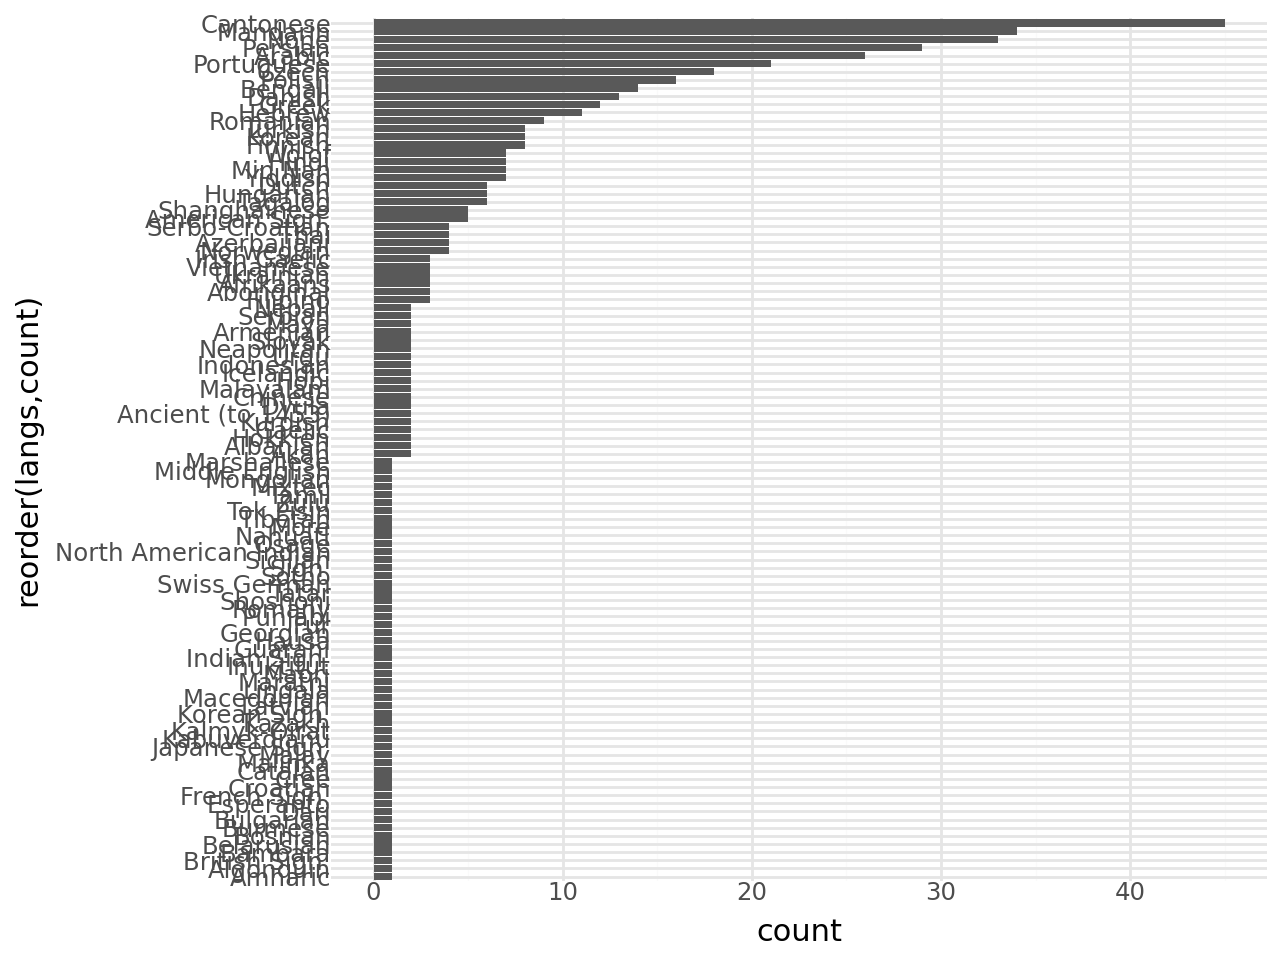

In [6]:
(
    exp_film
    .group_by(c.langs)
    .agg(
        count = pl.len()
    )
    .filter(c.count < 50)
    .pipe(ggplot, aes("reorder(langs,count)","count"))
    + geom_col()
    + coord_flip()
)

Using the exploded language data, compute the average IMDB rating and the number of films for each language. Create a scatter plot with the count on the x-axis and the average rating on the y-axis.

/usr/local/lib/python3.12/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


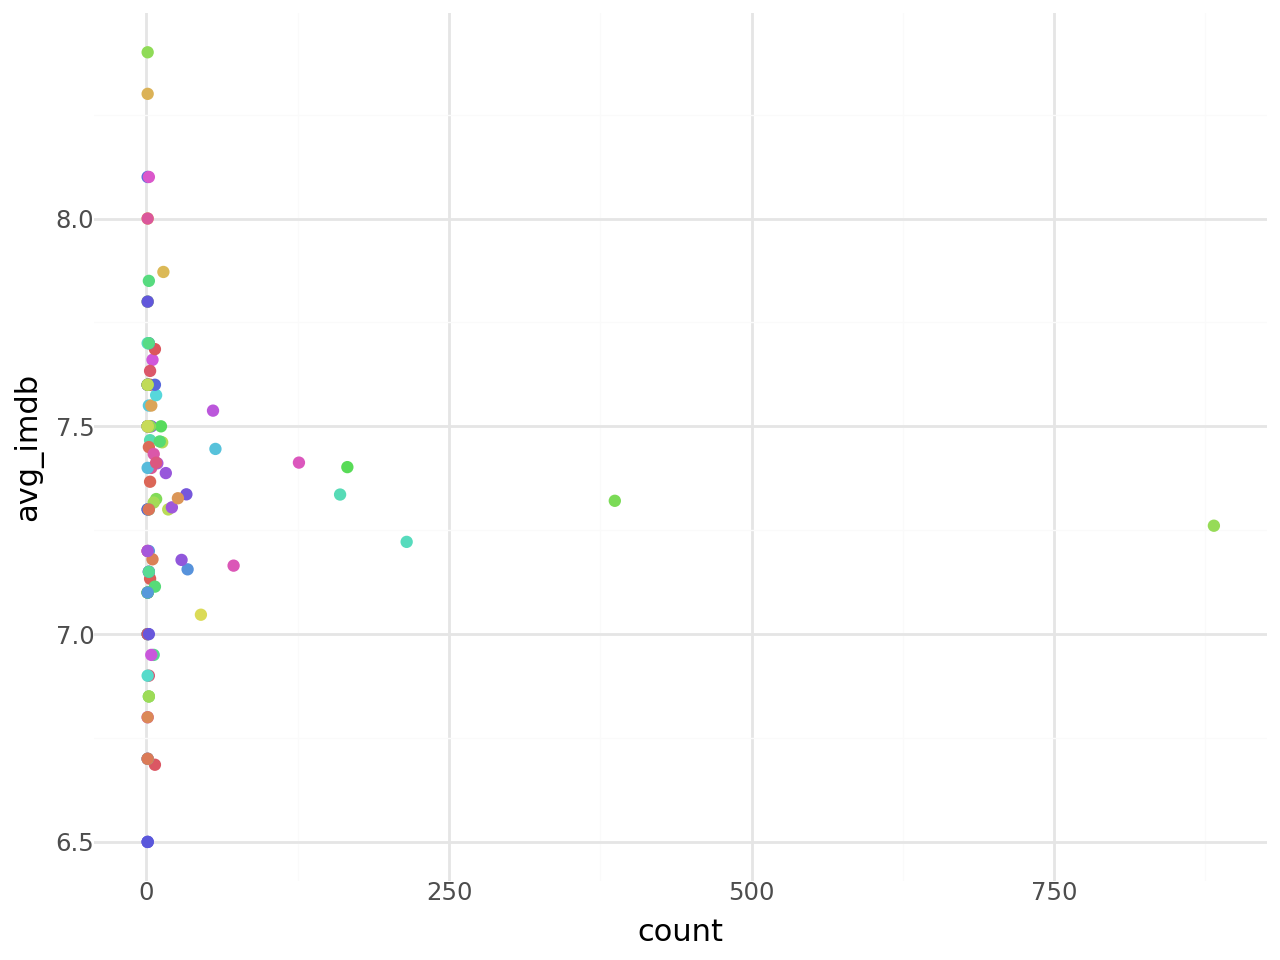

In [7]:
(
    exp_film
    .group_by(c.langs)
    .agg(
        avg_imdb = c.rating_imdb.mean(),
        count = pl.len()
    )
    .pipe(ggplot, aes("count", "avg_imdb"))
    + geom_point(aes(color="langs"), show_legend=False)
)

Filter to only these languages: English, French, Japanese, Italian, and German. Create a boxplot showing the distribution of runtimes for films in each of these languages.

/usr/local/lib/python3.12/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 55 rows containing non-finite values.


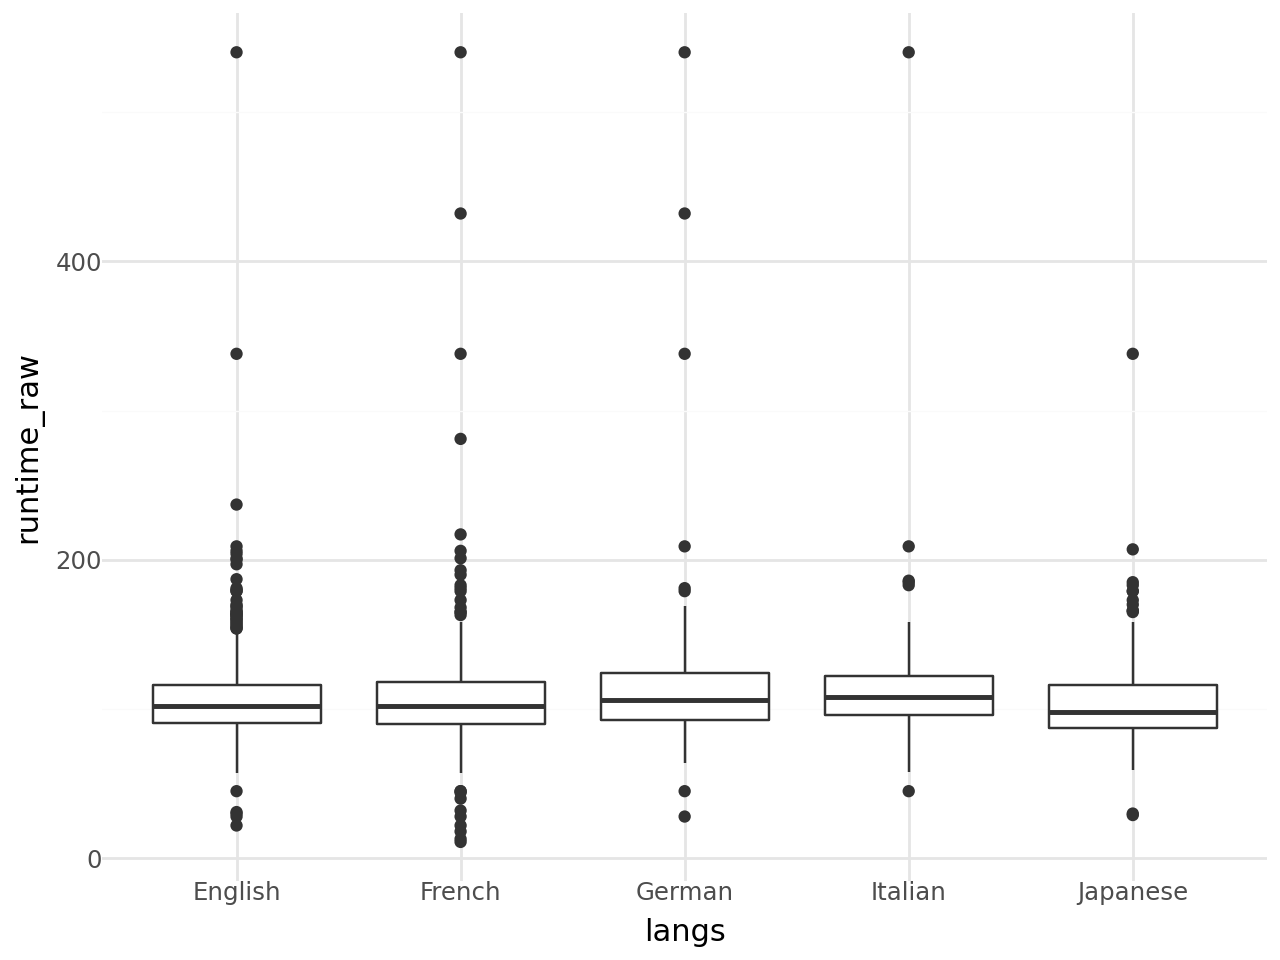

In [8]:
(
    exp_film
    .filter(c.langs.is_in(["English","French","Japanese","Italian","German"]))
    .pipe(ggplot, aes("langs","runtime_raw"))
    + geom_boxplot()
)

Now, we are going to compute the number of films from each country, sorting from the most to the least and taking the top 10 countries. We will count a country anytime it is listed as at least one of the countries a film was produced in. Save the dataset as `top_countries` and then make sure to still print it out on the last line. Do any of the responses surprise you?

In [9]:
top_countries = (
    exp_film
    .with_columns(
        countries = c.country.str.split("|")
    )
    .explode(c.countries)
    .group_by(c.countries)
    .agg(
        num_films = pl.len()
    )
    .sort(c.num_films, descending = True)
    .head(10)
)
top_countries

countries,num_films
str,u32
"""United States""",1002
"""France""",702
"""United Kingdom""",291
"""Japan""",286
"""Italy""",278
"""Sweden""",135
"""Germany""",135
"""West Germany""",133
"""Hong Kong""",90


Now, count the combinations of decade and country, keeping only those countries that are in the `top_countries` dataset. Use a semi-join for the filtering and sort the final results by count, but keep all of the rows. You do not need to save the output.

In [10]:
(
    film
    .with_columns(
        countries = c.country.str.split("|"),
        decade = (c.year // 10 * 10)
    )
    .explode(c.countries)
    .join(top_countries, on="countries", how="semi")
    .group_by([c.decade, c.countries])
    .agg(
        dec_ctr_count = pl.len()
    )
    .sort(c.dec_ctr_count, descending=True)
)

decade,countries,dec_ctr_count
i64,str,u32
1970,"""United States""",85
1980,"""United States""",85
1990,"""United States""",84
1960,"""Japan""",80
1960,"""France""",73
…,…,…
1920,"""United Kingdom""",1
2010,"""Sweden""",1
1990,"""Italy""",1


Now, add to what you have above a pivot that puts the countries in the columns of the dataset. Use the method `.fill_null(0)` afterwards to fill in the missing values (these are combinations that never occur). The final table is a way of seeing how the number of films from each country in the collection changes by decade.

In [11]:
(
    film
    .with_columns(
        countries = c.country.str.split("|"),
        decade = (c.year // 10 * 10)
    )
    .explode(c.countries)
    .join(top_countries, on="countries", how="semi")
    .group_by([c.decade, c.countries])
    .agg(
        dec_ctr_count = pl.len()
    )
    .sort(c.dec_ctr_count, descending=True)
    .pivot(
        index="decade",
        on="countries",
        values="dec_ctr_count"
    )
    .fill_null(0)
)

decade,United States,Japan,France,Italy,West Germany,United Kingdom,Sweden,Germany,Hong Kong,Mexico
i64,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
1970,85,22,49,21,29,17,9,0,10,3
1980,85,9,30,6,16,25,4,0,9,3
1990,84,11,40,1,0,26,3,10,13,2
1960,55,80,73,48,9,21,22,0,2,3
1940,50,17,16,8,0,25,6,1,0,0
…,…,…,…,…,…,…,…,…,…,…
2000,42,4,23,6,0,10,3,14,6,5
1930,40,19,31,0,0,15,5,7,0,2
2010,32,3,21,6,0,8,1,9,0,2


Let's do one more analysis with two columns split apart. This creates a dataset with all combinations of the two categories. Note that we have to do two different calls to `.explode`. Start by expanding the director and writer columns.

In [32]:
double_split = (
    film
    .with_columns(
        writer = c.writer.str.split("|"),
        director = c.director.str.split("|"),
        decade = c.year // 10 * 10
    )
    .explode(c.writer)
    .explode(c.director)
)

Now, determine which films have at least one directory equal to at least one of its writers. Then, compute the average of films over each decade and sort by decade. Be careful about the unit of observation here!

In [33]:
directory_writer = (
    double_split
    .group_by(c.title, c.decade)
    .agg(
        any_match = (c.writer == c.director).any()
    )
    .group_by(c.decade)
    .agg(
        proportion_match = c.any_match.mean()
    )
    .sort(c.decade)
)

Finish by turning the plot into a visualization with decade on the x-axis, proportion of the y-axis, using a line geometry. Make the x-axis have breaks every decade and the y-axis limits go from 0 to 1 to make the scale of the plot easier to comprehend.

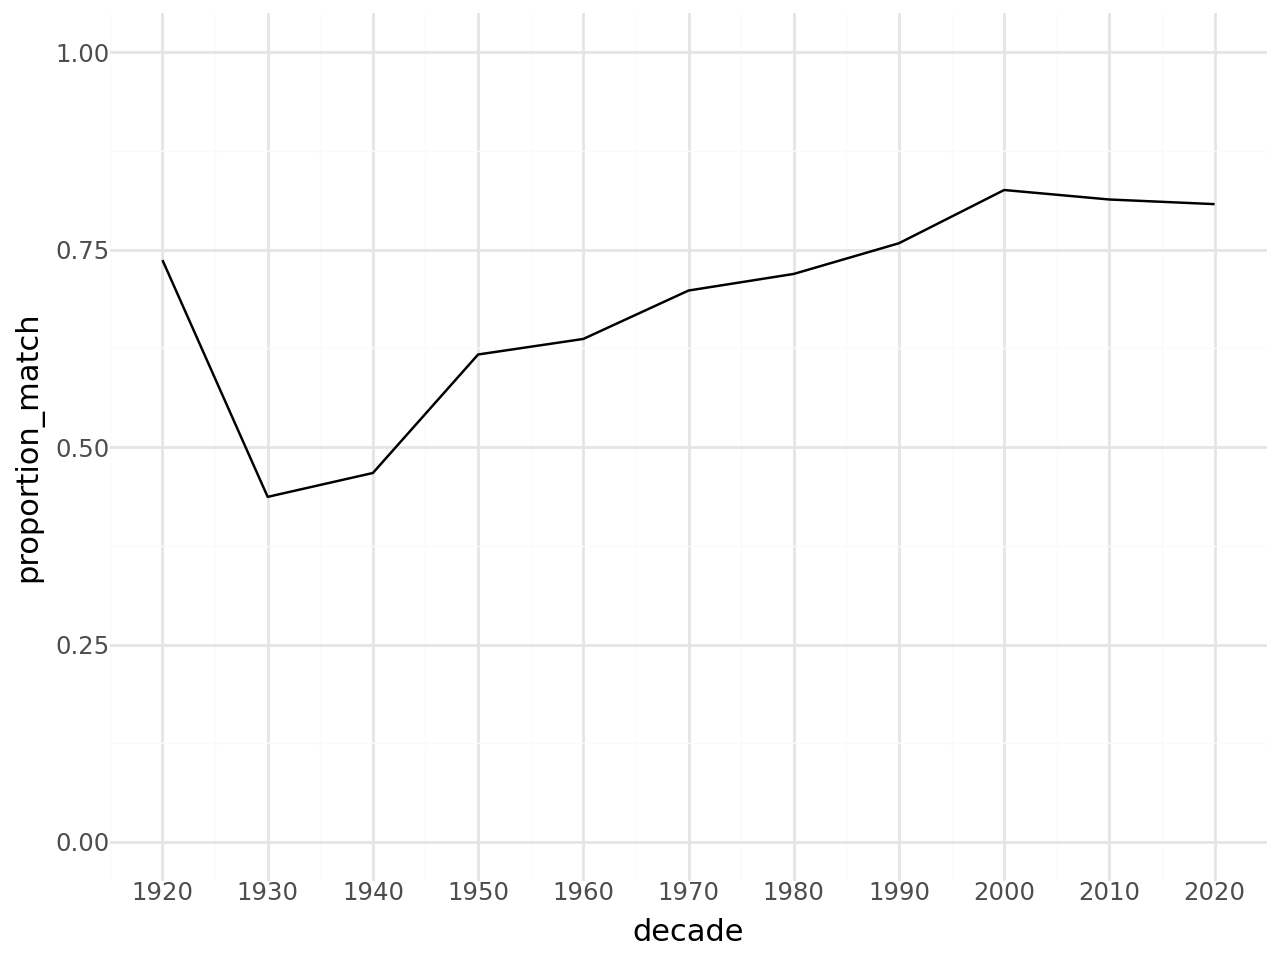

In [34]:
(
    directory_writer
    .pipe(ggplot, aes("decade", "proportion_match"))
    + geom_line()
    + scale_x_continuous(breaks=breaks_width(10))
    + ylim(0,1)
)